In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Academic and Entrepreneurial Development.csv")


In [9]:
df.shape


(214354, 49)

In [10]:
df= df.sample(frac=0.4, random_state=42).reset_index(drop=True)
df.shape

(85742, 49)

In [11]:
df.head()

,Student_ID,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
0,S069993,19,Male,Arts,1,Medium,Middle,Rural,Private,1.82,...,No,981.91,71.54,0,0,No,80.30,High,Completed,Failure
1,S184030,18,Female,Arts,4,Medium,Middle,Urban,Public,0.92,...,No,4622.57,40.19,0,0,Yes,54.91,Medium,Not Completed,Failure
2,S131716,19,Female,Engineering,2,Medium,Low,Urban,Public,1.89,...,Yes,4358.72,33.49,0,0,No,32.68,High,Not Completed,Failure
3,S005309,21,Female,Business,4,Low,High,Rural,Public,1.18,...,No,362.69,32.17,0,2,No,44.28,Low,Completed,Success
4,S062683,21,Female,Engineering,3,Medium,Low,Urban,Public,0.49,...,No,13868.31,56.43,0,0,No,21.16,Low,Completed,Failure


In [12]:
df.tail()

,Student_ID,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
85737,S068436,20,Female,Engineering,4,Medium,Low,Urban,Public,1.15,...,No,4179.12,46.41,1,0,No,37.67,High,Completed,Failure
85738,S116953,19,Female,Engineering,3,Medium,Low,Urban,Private,0.19,...,No,14556.87,38.71,0,0,No,23.14,Medium,Not Completed,Failure
85739,S211983,20,Male,Business,3,High,Middle,Urban,Public,0.92,...,No,9085.67,37.11,0,1,No,46.33,Medium,Not Completed,Failure
85740,S191872,19,Female,Sciences,4,Medium,Middle,Rural,Private,0.78,...,No,6990.66,43.37,0,0,No,43.72,Medium,Not Completed,Failure
85741,S027862,21,Male,Arts,4,Medium,Low,Urban,Public,1.71,...,No,2541.07,59.32,0,0,Yes,20.21,Low,Not Completed,Failure


In [13]:
df.drop(["Student_ID"],axis=1, inplace=True)
df.head()

,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
0,19,Male,Arts,1,Medium,Middle,Rural,Private,1.82,79.32,...,No,981.91,71.54,0,0,No,80.30,High,Completed,Failure
1,18,Female,Arts,4,Medium,Middle,Urban,Public,0.92,50.00,...,No,4622.57,40.19,0,0,Yes,54.91,Medium,Not Completed,Failure
2,19,Female,Engineering,2,Medium,Low,Urban,Public,1.89,72.38,...,Yes,4358.72,33.49,0,0,No,32.68,High,Not Completed,Failure
3,21,Female,Business,4,Low,High,Rural,Public,1.18,83.40,...,No,362.69,32.17,0,2,No,44.28,Low,Completed,Success
4,21,Female,Engineering,3,Medium,Low,Urban,Public,0.49,69.31,...,No,13868.31,56.43,0,0,No,21.16,Low,Completed,Failure


In [14]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1,"Other":3})
df.head()

<ipython-input-14-6aa4a8ec94a8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"Male":0,"Female":1,"Other":3})


,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
0,19,0,Arts,1,Medium,Middle,Rural,Private,1.82,79.32,...,No,981.91,71.54,0,0,No,80.30,High,Completed,Failure
1,18,1,Arts,4,Medium,Middle,Urban,Public,0.92,50.00,...,No,4622.57,40.19,0,0,Yes,54.91,Medium,Not Completed,Failure
2,19,1,Engineering,2,Medium,Low,Urban,Public,1.89,72.38,...,Yes,4358.72,33.49,0,0,No,32.68,High,Not Completed,Failure
3,21,1,Business,4,Low,High,Rural,Public,1.18,83.40,...,No,362.69,32.17,0,2,No,44.28,Low,Completed,Success
4,21,1,Engineering,3,Medium,Low,Urban,Public,0.49,69.31,...,No,13868.31,56.43,0,0,No,21.16,Low,Completed,Failure


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85742 entries, 0 to 85741
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     85742 non-null  int64  
 1   Gender                                  85742 non-null  int64  
 2   Major                                   85742 non-null  object 
 3   Year_of_Study                           85742 non-null  int64  
 4   Educational_Background                  85742 non-null  object 
 5   Socioeconomic_Status                    85742 non-null  object 
 6   Location                                85742 non-null  object 
 7   High_School_Type                        85742 non-null  object 
 8   Cumulative_GPA                          85742 non-null  float64
 9   Course_Grades                           85742 non-null  float64
 10  Attendance                              85742 non-null  fl

In [16]:
df["Major"].value_counts()

,count
Major,
Engineering,34103
Business,25800
Arts,12963
Sciences,12876


In [17]:
df.head()

,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
0,19,0,Arts,1,Medium,Middle,Rural,Private,1.82,79.32,...,No,981.91,71.54,0,0,No,80.30,High,Completed,Failure
1,18,1,Arts,4,Medium,Middle,Urban,Public,0.92,50.00,...,No,4622.57,40.19,0,0,Yes,54.91,Medium,Not Completed,Failure
2,19,1,Engineering,2,Medium,Low,Urban,Public,1.89,72.38,...,Yes,4358.72,33.49,0,0,No,32.68,High,Not Completed,Failure
3,21,1,Business,4,Low,High,Rural,Public,1.18,83.40,...,No,362.69,32.17,0,2,No,44.28,Low,Completed,Success
4,21,1,Engineering,3,Medium,Low,Urban,Public,0.49,69.31,...,No,13868.31,56.43,0,0,No,21.16,Low,Completed,Failure


In [18]:
from sklearn.preprocessing import OneHotEncoder

#initializing encoder without removing any categories
encoder= OneHotEncoder(sparse_output=False) #this keeps all categories

encoded_array=encoder.fit_transform(df[["Major"]])

encoded_df=pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(["Major"]))

df=pd.concat([df.drop("Major", axis=1), encoded_df],axis=1)

df.head()

,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,Medium,Middle,Rural,Private,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,Medium,Middle,Urban,Public,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,Medium,Low,Urban,Public,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,Low,High,Rural,Public,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,Medium,Low,Urban,Public,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [19]:
df["Age"].value_counts()

,count
Age,
20,42961
21,21533
19,12844
18,4218
22,4186


In [20]:
df["High_School_Type"].value_counts()

,count
High_School_Type,
Public,68533
Private,17209


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85742 entries, 0 to 85741
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     85742 non-null  int64  
 1   Gender                                  85742 non-null  int64  
 2   Year_of_Study                           85742 non-null  int64  
 3   Educational_Background                  85742 non-null  object 
 4   Socioeconomic_Status                    85742 non-null  object 
 5   Location                                85742 non-null  object 
 6   High_School_Type                        85742 non-null  object 
 7   Cumulative_GPA                          85742 non-null  float64
 8   Course_Grades                           85742 non-null  float64
 9   Attendance                              85742 non-null  float64
 10  Project_Scores                          85742 non-null  fl

In [22]:
df['Educational_Background'].value_counts()

,count
Educational_Background,
Medium,51371
High,25712
Low,8659


In [23]:
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
}

# Replace values in the 'Educational_Background' column using the mapping
df['Educational_Background'] = df['Educational_Background'].replace(mapping)

df.head()

<ipython-input-23-4df54efd9634>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Educational_Background'] = df['Educational_Background'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,Middle,Rural,Private,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,Middle,Urban,Public,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,Low,Urban,Public,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,High,Rural,Public,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,Low,Urban,Public,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [24]:
df['Socioeconomic_Status'].value_counts()

,count
Socioeconomic_Status,
Middle,42702
Low,34424
High,8616


In [25]:
mapping = {
    'Low': 0,
    'Middle': 1,
    'High': 2,
}

# Replace values in the 'Socioeconomic_Status' column using the mapping
df['Socioeconomic_Status'] = df['Socioeconomic_Status'].replace(mapping)

df.head()

<ipython-input-25-fc36d1609b66>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Socioeconomic_Status'] = df['Socioeconomic_Status'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,Rural,Private,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,Urban,Public,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,Urban,Public,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,Rural,Public,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,Urban,Public,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [26]:
df['Location'].value_counts()

,count
Location,
Urban,60240
Rural,25502


In [27]:
mapping = {
    'Urban': 0,
    'Rural': 1,
}

# Replace values in the 'Socioeconomic_Status' column using the mapping
df['Location'] = df['Location'].replace(mapping)

df.head()

<ipython-input-27-856fc88c2580>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Location'] = df['Location'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,Private,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,Public,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,Public,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,Public,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,Public,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [28]:
df['High_School_Type'].value_counts()

,count
High_School_Type,
Public,68533
Private,17209


In [29]:
mapping = {
    'Public': 0,
    'Private': 1,
}

# Replace values in the 'High_School_Type' column using the mapping
df['High_School_Type'] = df['High_School_Type'].replace(mapping)

df.head()

<ipython-input-29-d81879223488>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['High_School_Type'] = df['High_School_Type'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [30]:
# Internship_Experience
df['Internship_Experience'].value_counts()

,count
Internship_Experience,
No,60113
Yes,25629


In [31]:
# Internship_Experience
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Internship_Experience' column using the mapping
df['Internship_Experience'] = df['Internship_Experience'].replace(mapping)

df.head()

<ipython-input-31-6b9c673af097>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internship_Experience'] = df['Internship_Experience'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [32]:
# Club_Membership
df['Club_Membership'].value_counts()

,count
Club_Membership,
No,51520
Yes,34222


In [33]:
# Club_Membership
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Club_Membership' column using the mapping
df['Club_Membership'] = df['Club_Membership'].replace(mapping)

df.head()

<ipython-input-33-236c43158735>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Club_Membership'] = df['Club_Membership'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [34]:
# Leadership_Roles
df['Leadership_Roles'].value_counts()

,count
Leadership_Roles,
No,68479
Yes,17263


In [35]:
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Leadership_Roles' column using the mapping
df['Leadership_Roles'] = df['Leadership_Roles'].replace(mapping)

df.head()

<ipython-input-35-1c32e69e129c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Leadership_Roles'] = df['Leadership_Roles'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [36]:
# Learning_Style
df['Learning_Style'].value_counts()

,count
Learning_Style,
Visual,51472
Auditory,25712
Kinesthetic,8558


In [37]:
mapping = {
    'Visual': 0,
    'Auditory': 1,
    'Kinesthetic': 2,
}

# Replace values in the 'Learning_Style' column using the mapping
df['Learning_Style'] = df['Learning_Style'].replace(mapping)

df.head()

<ipython-input-37-9616f521a6db>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Learning_Style'] = df['Learning_Style'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [38]:
# Exposure_to_Entrepreneurial_Curriculum
df['Exposure_to_Entrepreneurial_Curriculum'].value_counts()

,count
Exposure_to_Entrepreneurial_Curriculum,
Medium,42613
Low,25849
High,17280


In [39]:
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
}

# Replace values in the 'Exposure_to_Entrepreneurial_Curriculum' column using the mapping
df['Exposure_to_Entrepreneurial_Curriculum'] = df['Exposure_to_Entrepreneurial_Curriculum'].replace(mapping)

df.head()

<ipython-input-39-986671c54876>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exposure_to_Entrepreneurial_Curriculum'] = df['Exposure_to_Entrepreneurial_Curriculum'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [40]:
# Prototypes_Developed
df['Prototypes_Developed'].value_counts()

,count
Prototypes_Developed,
No,60001
Yes,25741


In [41]:
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Prototypes_Developed' column using the mapping
df['Prototypes_Developed'] = df['Prototypes_Developed'].replace(mapping)

df.head()

<ipython-input-41-5d88514217f8>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Prototypes_Developed'] = df['Prototypes_Developed'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [42]:
# Startup_Founded
df['Startup_Founded'].value_counts()

,count
Startup_Founded,
No,77056
Yes,8686


In [43]:
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Startup_Founded' column using the mapping
df['Startup_Founded'] = df['Startup_Founded'].replace(mapping)

df.head()

<ipython-input-43-1512ff1b5402>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Startup_Founded'] = df['Startup_Founded'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,No,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,Yes,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,No,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,No,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,No,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [44]:
# Employment_in_Entrepreneurial_Roles
df['Employment_in_Entrepreneurial_Roles'].value_counts()

,count
Employment_in_Entrepreneurial_Roles,
No,72952
Yes,12790


In [45]:
mapping = {
    'No': 0,
    'Yes': 1,
}

# Replace values in the 'Employment_in_Entrepreneurial_Roles' column using the mapping
df['Employment_in_Entrepreneurial_Roles'] = df['Employment_in_Entrepreneurial_Roles'].replace(mapping)

df.head()

<ipython-input-45-f6e9b85df9c7>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employment_in_Entrepreneurial_Roles'] = df['Employment_in_Entrepreneurial_Roles'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,0,80.30,High,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,1,54.91,Medium,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,0,32.68,High,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,0,44.28,Low,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,0,21.16,Low,Completed,Failure,0.0,0.0,1.0,0.0


In [46]:
# Entrepreneurial_Talent_Level
df['Entrepreneurial_Talent_Level'].value_counts()

,count
Entrepreneurial_Talent_Level,
Medium,42964
Low,25648
High,17130


In [47]:
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
}

# Replace values in the 'Entrepreneurial_Talent_Level' column using the mapping
df['Entrepreneurial_Talent_Level'] = df['Entrepreneurial_Talent_Level'].replace(mapping)

df.head()

<ipython-input-47-7912817ae326>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Entrepreneurial_Talent_Level'] = df['Entrepreneurial_Talent_Level'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,0,80.30,2,Completed,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,1,54.91,1,Not Completed,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,0,32.68,2,Not Completed,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,0,44.28,0,Completed,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,0,21.16,0,Completed,Failure,0.0,0.0,1.0,0.0


In [48]:
df['Prototype_Completion'].value_counts()

,count
Prototype_Completion,
Not Completed,60252
Completed,25490


In [49]:
mapping = {
    'Not Completed': 0,
    'Completed': 1,
}

# Replace values in the 'Prototype_Completion' column using the mapping
df['Prototype_Completion'] = df['Prototype_Completion'].replace(mapping)

df.head()

<ipython-input-49-c7520a3ff092>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Prototype_Completion'] = df['Prototype_Completion'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,0,80.30,2,1,Failure,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,1,54.91,1,0,Failure,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,0,32.68,2,0,Failure,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,0,44.28,0,1,Success,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,0,21.16,0,1,Failure,0.0,0.0,1.0,0.0


In [50]:
df['Startup_Success'].value_counts()

,count
Startup_Success,
Failure,77207
Success,8535


In [51]:
mapping = {
    'Failure': 0,
    'Success': 1,
}

# Replace values in the 'Startup_Success' column using the mapping
df['Startup_Success'] = df['Startup_Success'].replace(mapping)

df.head()

<ipython-input-51-6660d4eb1ec9>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Startup_Success'] = df['Startup_Success'].replace(mapping)


,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,0,80.30,2,1,0,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,1,54.91,1,0,0,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,0,32.68,2,0,0,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,0,44.28,0,1,1,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,0,21.16,0,1,0,0.0,0.0,1.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85742 entries, 0 to 85741
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     85742 non-null  int64  
 1   Gender                                  85742 non-null  int64  
 2   Year_of_Study                           85742 non-null  int64  
 3   Educational_Background                  85742 non-null  int64  
 4   Socioeconomic_Status                    85742 non-null  int64  
 5   Location                                85742 non-null  int64  
 6   High_School_Type                        85742 non-null  int64  
 7   Cumulative_GPA                          85742 non-null  float64
 8   Course_Grades                           85742 non-null  float64
 9   Attendance                              85742 non-null  float64
 10  Project_Scores                          85742 non-null  fl

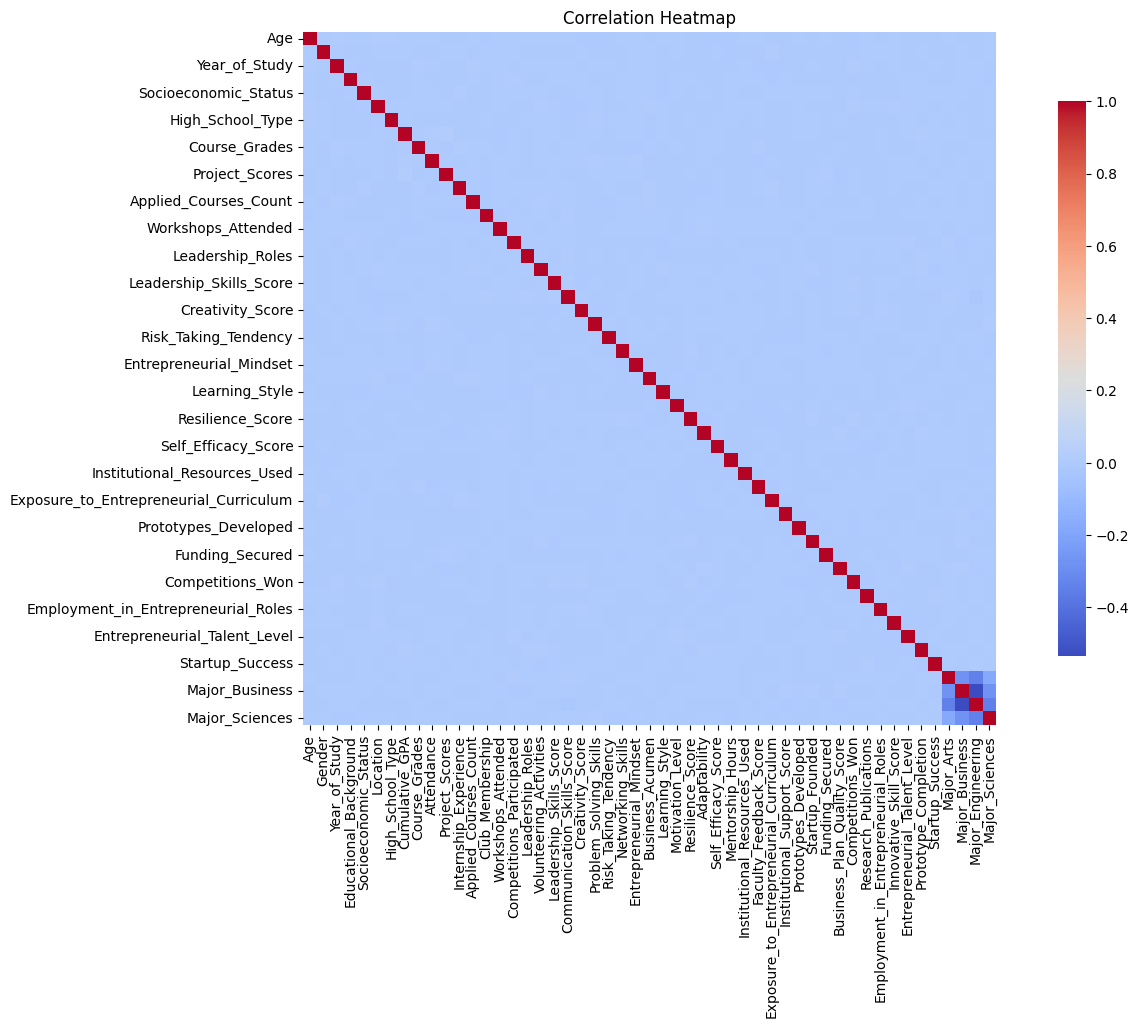

In [53]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

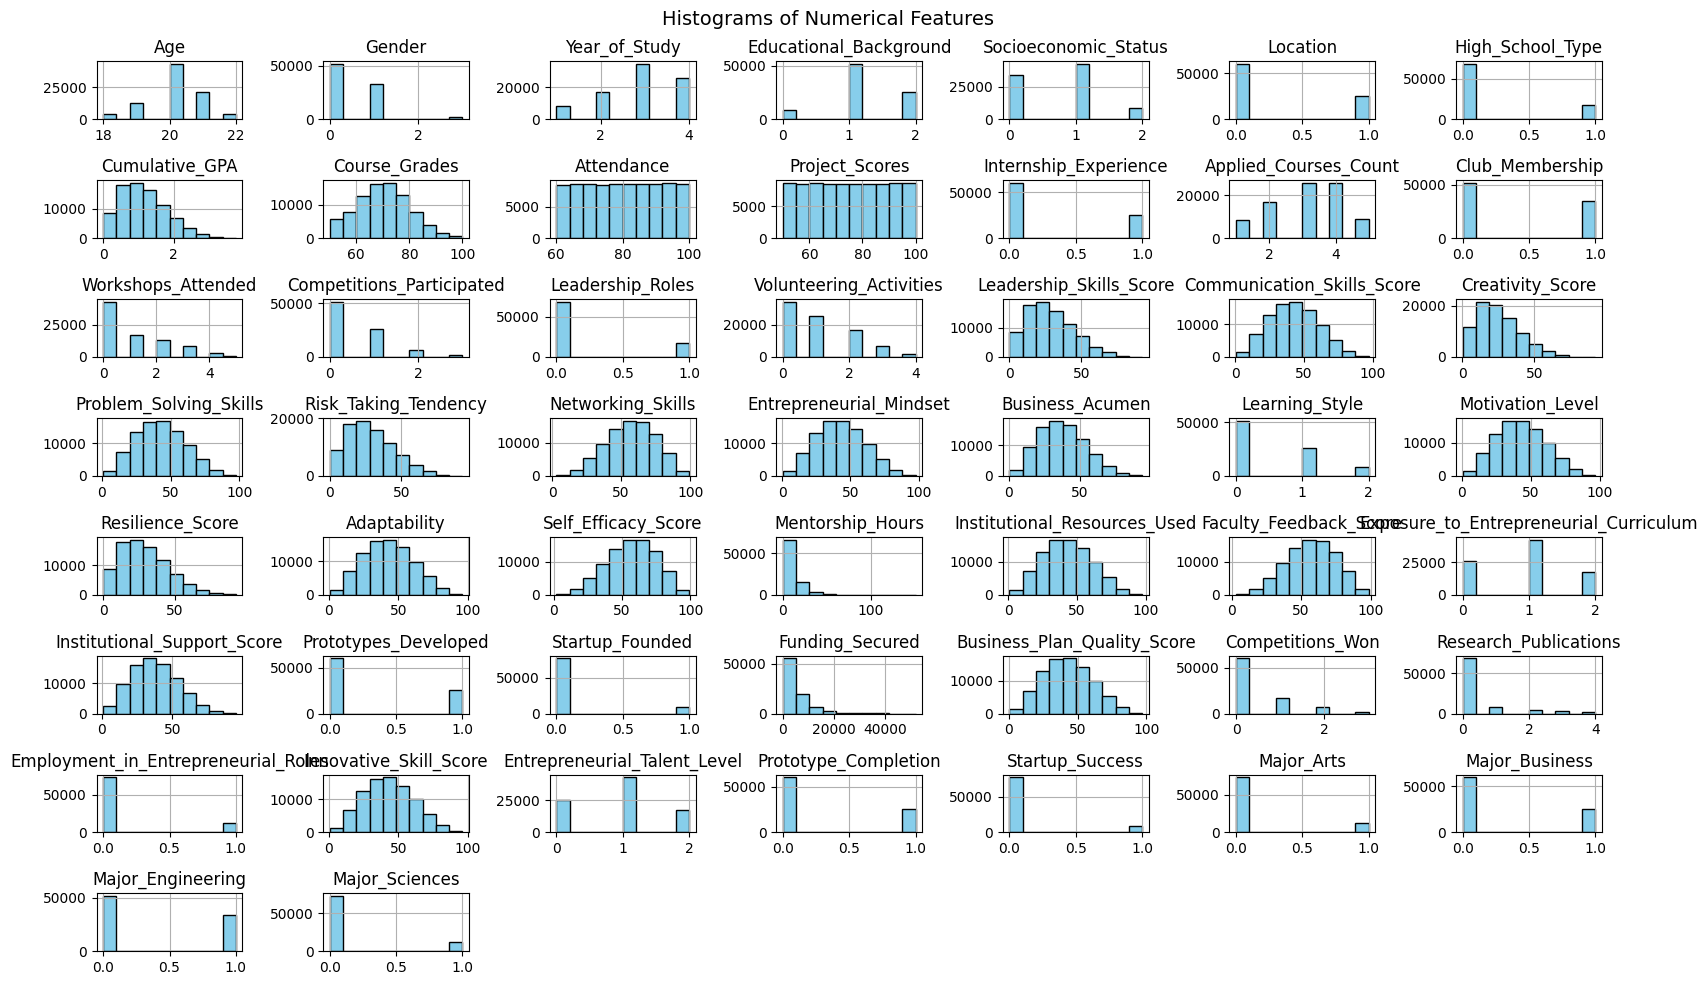

In [54]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
numerical_df.hist(bins=10, figsize=(16, 10), color='skyblue', edgecolor='black')

# Add title
plt.suptitle("Histograms of Numerical Features", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85742.0,20.100592,0.884808,18.00,20.00,20.000,21.0000,22.00
Gender,85742.0,0.442024,0.607827,0.00,0.00,0.000,1.0000,3.00
Year_of_Study,85742.0,2.905531,0.940980,1.00,2.00,3.000,4.0000,4.00
Educational_Background,85742.0,1.198887,0.601094,0.00,1.00,1.000,2.0000,2.00
Socioeconomic_Status,85742.0,0.699004,0.641387,0.00,0.00,1.000,1.0000,2.00
Location,85742.0,0.297427,0.457129,0.00,0.00,0.000,1.0000,1.00
High_School_Type,85742.0,0.200707,0.400531,0.00,0.00,0.000,0.0000,1.00
Cumulative_GPA,85742.0,1.145387,0.638801,0.00,0.65,1.060,1.5600,3.76
Course_Grades,85742.0,70.114509,9.810379,50.00,63.28,70.060,76.8275,100.00
Attendance,85742.0,80.075697,11.549944,60.00,70.07,80.110,90.1000,100.00


In [56]:
df.isnull().sum()

,0
Age,0
Gender,0
Year_of_Study,0
Educational_Background,0
Socioeconomic_Status,0
Location,0
High_School_Type,0
Cumulative_GPA,0
Course_Grades,0
Attendance,0


In [57]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
85737,False
85738,False
85739,False
85740,False


In [58]:
df.head()

,Age,Gender,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,Course_Grades,Attendance,...,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success,Major_Arts,Major_Business,Major_Engineering,Major_Sciences
0,19,0,1,1,1,1,1,1.82,79.32,90.29,...,0,0,80.30,2,1,0,1.0,0.0,0.0,0.0
1,18,1,4,1,1,0,0,0.92,50.00,67.01,...,0,1,54.91,1,0,0,1.0,0.0,0.0,0.0
2,19,1,2,1,0,0,0,1.89,72.38,80.65,...,0,0,32.68,2,0,0,0.0,0.0,1.0,0.0
3,21,1,4,0,2,1,0,1.18,83.40,68.35,...,2,0,44.28,0,1,1,0.0,1.0,0.0,0.0
4,21,1,3,1,0,0,0,0.49,69.31,72.52,...,0,0,21.16,0,1,0,0.0,0.0,1.0,0.0


In [59]:
# Define features (X) and target (y)
X = df.drop(columns=["Entrepreneurial_Talent_Level"]).values  # All columns except target
y = df["Entrepreneurial_Talent_Level"].values  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for gradient descent & models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset loaded and preprocessed successfully.")

Dataset loaded and preprocessed successfully.


In [60]:
print(np.isnan(X_train).sum())

0


In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # Use "median" if data is skewed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [62]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [63]:
# LogisticRegression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.weights = None  # Initialize weights to None
        self.bias = None  # Initialize bias to None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Initialize bias to zero

        # Training loop
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias  # Linear model output
            y_predicted = sigmoid(linear_model)  # Apply sigmoid function

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Gradient for weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Gradient for bias

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # Compute linear model output
        y_predicted = sigmoid(linear_model)  # Apply sigmoid function
        return [1 if i > 0.5 else 0 for i in y_predicted]  # Return predicted class (0 or 1)

In [65]:
# Create an instance of the LogisticRegressionScratch class
model_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)

# Train the model on the balanced dataset
model_scratch.fit(X_train_balanced, y_train_balanced)

In [66]:
y_pred_scratch = model_scratch.predict(X_test)

In [67]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_scratch)
precision = precision_score(y_test, y_pred_scratch, average='weighted')
recall = recall_score(y_test, y_pred_scratch, average='weighted')
f1 = f1_score(y_test, y_pred_scratch, average='weighted')

# Display the results
print("Scratch model output:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Scratch model output:
Accuracy: 0.4941
Precision: 0.2442
Recall: 0.4941
F1 Score: 0.3268


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


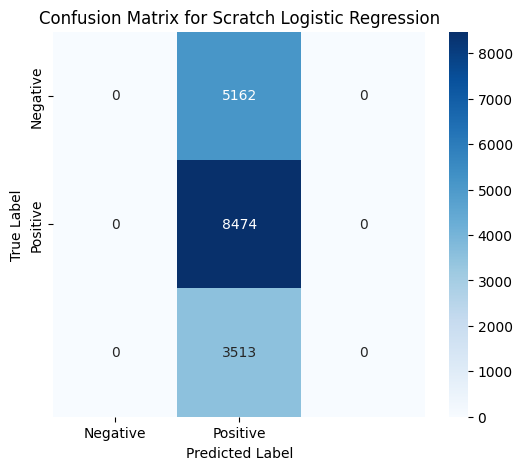

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_scratch)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Scratch Logistic Regression")

# Show plot
plt.show()

In [69]:
# model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression using Sklearn
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000)

In [70]:
# Make Predictions on the Test Set
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate the Sklearn Model

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')
# Display the results for Sklearn Logistic Regression
print("Logistic Regression (Sklearn):")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")


Logistic Regression (Sklearn):
Accuracy: 0.3387
Precision: 0.3753
Recall: 0.3387
F1 Score: 0.3479


**Random Forest**


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display the results
print("Random Forest Classification:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Classification:
Accuracy: 0.4885
Precision: 0.3825
Recall: 0.4885
F1 Score: 0.3412


Hyper parameter tuning


Logistic regression

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display the results
print("Random Forest Classification:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'max_iter': [100, 500, 1000]  # Iterations
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression and GridSearchCV
model_sklearn = LogisticRegression()
grid_search = GridSearchCV(estimator=model_sklearn, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit model
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters: {'C': 0.001, 'max_iter': 100}
Best Cross-Validation Score: 0.3584807190489997


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Best model with the optimal parameters
best_model = LogisticRegression(C=0.1, max_iter=100)

# Train the best model
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_sklearn = best_model.predict(X_test)

# Evaluate performance
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')

# Print results
print("Logistic Regression (Sklearn) after Tuning:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")


Logistic Regression (Sklearn) after Tuning:
Accuracy: 0.3387
Precision: 0.3754
Recall: 0.3387
F1 Score: 0.3480


Random forest classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, ],   # Number of trees
    'max_depth': [5, 10, 20, None],        # Depth of each tree
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples in each leaf node
    'bootstrap': [True, False]             # Use bootstrapping or not
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with 5-fold CV
random_search_rf = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and best cross-validation score
best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_

print("Best parameters for Random Forest:", best_params)
print("Best cross-validation score (Accuracy):", best_score)


Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': True}
Best cross-validation score (Accuracy): 0.5028355665275903


In [77]:
# Train the best model found from tuning
best_rf_model = random_search_rf.best_estimator_

# Make predictions
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Display results
print("Classification (After Tuning):")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")

Classification (After Tuning):
Accuracy: 0.4941
Precision: 0.2442
Recall: 0.4941
F1 Score: 0.3268


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Selection

Logistic Regression

For rfc

In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

# Ensure X_train is a Pandas DataFrame
if isinstance(X_train_balanced, np.ndarray):
    X_train_balanced = pd.DataFrame(X_train_balanced)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Automatically extract feature names if using a DataFrame
feature_names = X_train_balanced.columns

# Apply SelectKBest (ANOVA F-test) for feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)

# Get selected feature names
selected_features = feature_names[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: [6, 15, 16, 41, 45]


In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure X_train is a Pandas DataFrame
if isinstance(X_train_balanced, np.ndarray):
    X_train_balanced = pd.DataFrame(X_train_balanced)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Automatically extract feature names if using a DataFrame
feature_names = X_train_balanced.columns

# Apply SelectKBest (ANOVA F-test) for feature selection (selecting top 5 features)
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = feature_names[selector.get_support()]
print("Selected Features:", list(selected_features))

# Final Logistic Regression Model (with optimized parameters from previous tuning)
log_reg = LogisticRegression(C=0.1, max_iter=100)
log_reg.fit(X_train_selected, y_train_balanced)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_selected)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")

# Final Random Forest Model (with optimized parameters from previous tuning)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, bootstrap=True, random_state=42)
rf_model.fit(X_train_selected, y_train_balanced)

# Make predictions
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Selected Features: [6, 15, 16, 41, 45]
Logistic Regression Results:
Accuracy: 0.3424
Precision: 0.3752
Recall: 0.3424
F1 Score: 0.3345
Random Forest Results:
Accuracy: 0.4938
Precision: 0.4476
Recall: 0.4938
F1 Score: 0.3273



### 7. Conclusion

1. **Model Performance**:  
   - **Random Forest** performed better than **Logistic Regression** with an accuracy of **49.38%** vs. **34.24%**.
   - Both models showed low **precision** and **F1 score**, with **Random Forest** having a precision of **44.76%** and **F1 score** of **32.73%**, while **Logistic Regression** had a precision of **37.52%** and F1 score of **33.45%**.

2. **Impact of Methods**:  
   - **Cross-validation** ensured reliable performance evaluation across different data subsets.
   - **Feature selection** (SelectKBest) reduced dimensionality but did not significantly improve model performance, indicating further feature engineering might be required.

3. **Insights and Future Directions**:  
   - **Random Forest** generally outperforms **Logistic Regression** for complex datasets, but both models need improvements, especially in **precision** and **F1 score**.
   - Future work can focus on addressing **class imbalance** (e.g., using **SMOTE**), exploring **boosting algorithms** (e.g., XGBoost), and further **feature engineering** to improve model performance.



